# **Home Work 1 - Stock Analysis**

In [9]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import stock_analyzer as sa
import sp500_analyzer as spa


In [10]:
# Printing data
data = yf.download('^GSPC', start='1926-01-01', end='2025-01-01')
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1927-12-30,17.66,17.66,17.66,17.66,0
1928-01-03,17.76,17.76,17.76,17.76,0
1928-01-04,17.72,17.72,17.72,17.72,0
1928-01-05,17.55,17.55,17.55,17.55,0
1928-01-06,17.66,17.66,17.66,17.66,0
...,...,...,...,...,...
2024-12-24,6040.04,6040.10,5981.44,5984.63,1757720000
2024-12-26,6037.59,6049.75,6007.37,6024.97,2904530000


[*********************100%***********************]  1 of 1 completed


Analyzing TSLA...

Statistics:
Ticker: TSLA
Total Weeks: 52
Up Weeks: 27
Down Weeks: 25
Average Up Week Change (%): 7.92
Average Down Week Change (%): -5.61
Current Price: 403.84
YTD Change (%): 62.56


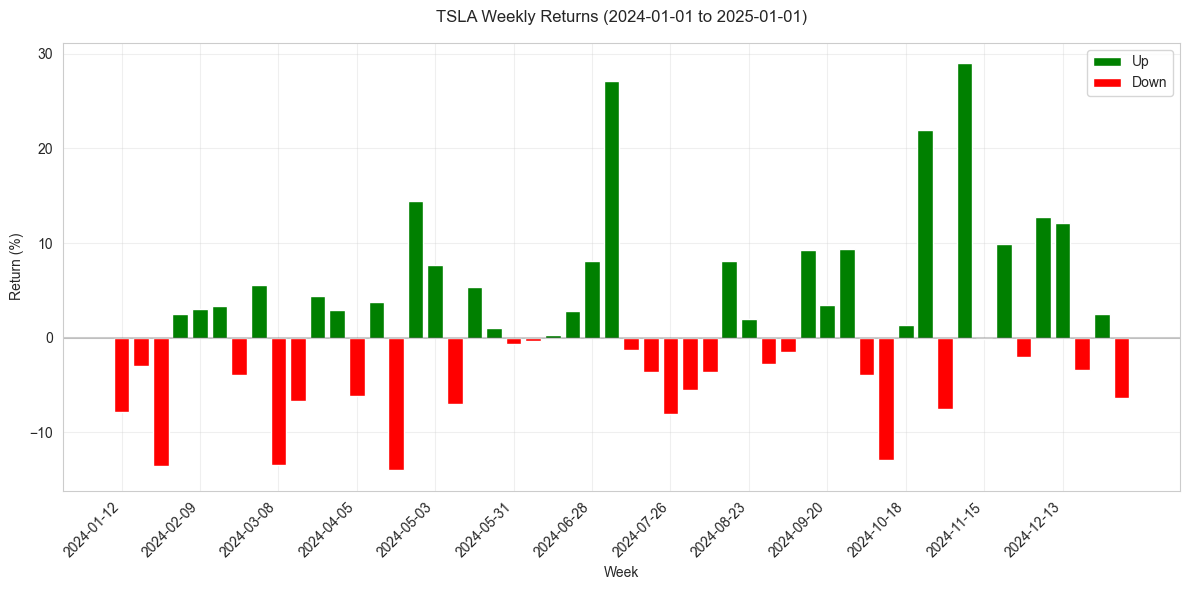

[*********************100%***********************]  1 of 1 completed



Analyzing PLTR...

Statistics:
Ticker: PLTR
Total Weeks: 52
Up Weeks: 31
Down Weeks: 21
Average Up Week Change (%): 8.61
Average Down Week Change (%): -4.11
Current Price: 75.63
YTD Change (%): 356.15


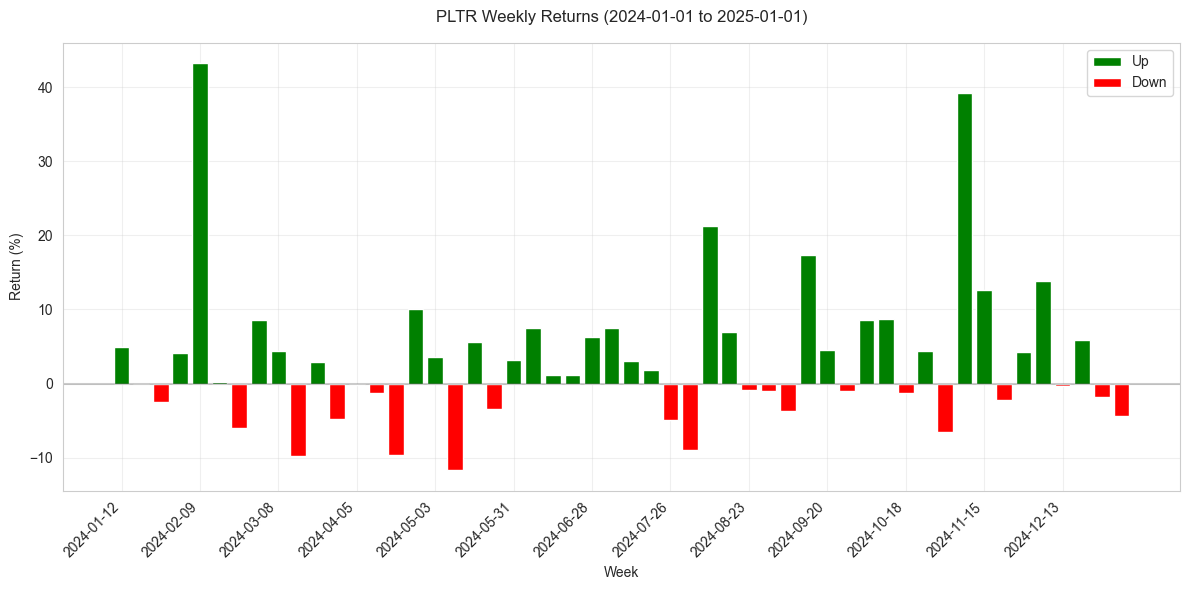

[*********************100%***********************]  1 of 1 completed


Analyzing MSFT...

Statistics:
Ticker: MSFT
Total Weeks: 52
Up Weeks: 31
Down Weeks: 21
Average Up Week Change (%): 2.22
Average Down Week Change (%): -2.5
Current Price: 419.89
YTD Change (%): 14.5


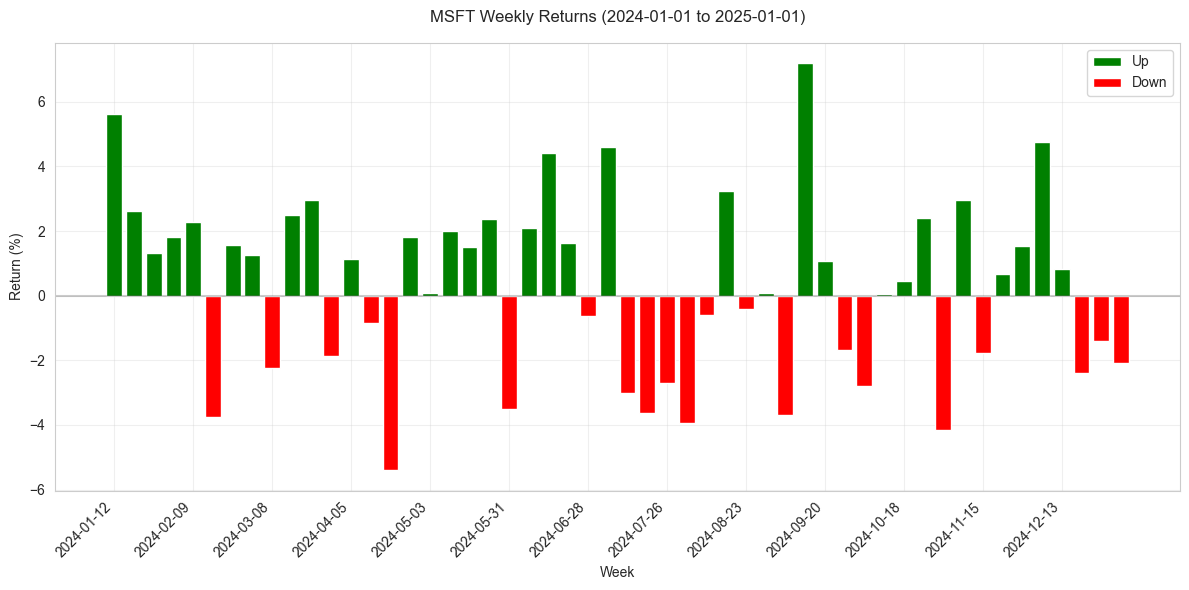


Summary of All Stocks:
        Total Weeks  Up Weeks  Down Weeks  Average Up Week Change (%)  \
Ticker                                                                  
TSLA             52        27          25                        7.92   
PLTR             52        31          21                        8.61   
MSFT             52        31          21                        2.22   

        Average Down Week Change (%)  Current Price  YTD Change (%)  
Ticker                                                               
TSLA                           -5.61         403.84           62.56  
PLTR                           -4.11          75.63          356.15  
MSFT                           -2.50         419.89           14.50  


In [11]:
def main():
    # Set up the plot style
    plt.style.use('default')
    sns.set_style("whitegrid")
    
    # Define analysis parameters
    tickers = ['TSLA', 'PLTR', 'MSFT']
    start_date = '2024-01-01'
    end_date = '2025-01-01'
    
    # Analyze each stock
    results = []
    for ticker in tickers:
        stats = sa.analyze_stock(ticker, start_date, end_date)
        if stats is not None:
            results.append(stats)
    
    # Create summary DataFrame
    if results:
        results_df = pd.DataFrame(results)
        print("\nSummary of All Stocks:")
        pd.set_option('display.float_format', '{:.2f}'.format)
        print(results_df.set_index('Ticker'))
    else:
        print("\nNo valid results to display.")

if __name__ == "__main__":
    main() 

# **Home Work 2 - S&P 500 Analysis**

[*********************100%***********************]  1 of 1 completed

Fetching S&P 500 historical data...
Fetched data from 1926-01-01 to 2025-01-01

Yearly Returns Analysis:
Total years analyzed: 97
Years categorized: 97

Breakdown:
Down Years (<0%): 31 (32.0%)
No Return Years (0-6%): 9 (9.3%)
Good Return Years (>6%): 57 (58.8%)

Total Positive Years (>0%): 66 (68.0%)

First 5 years of data for verification:
1928: 37.88% - Category: Good Return
1929: -11.91% - Category: Down Year
1930: -28.48% - Category: Down Year
1931: -47.07% - Category: Down Year
1932: -14.78% - Category: Down Year

Last 5 years of data for verification:
2020: 16.26% - Category: Good Return
2021: 26.89% - Category: Good Return
2022: -19.44% - Category: Down Year
2023: 24.23% - Category: Good Return
2024: 23.31% - Category: Good Return


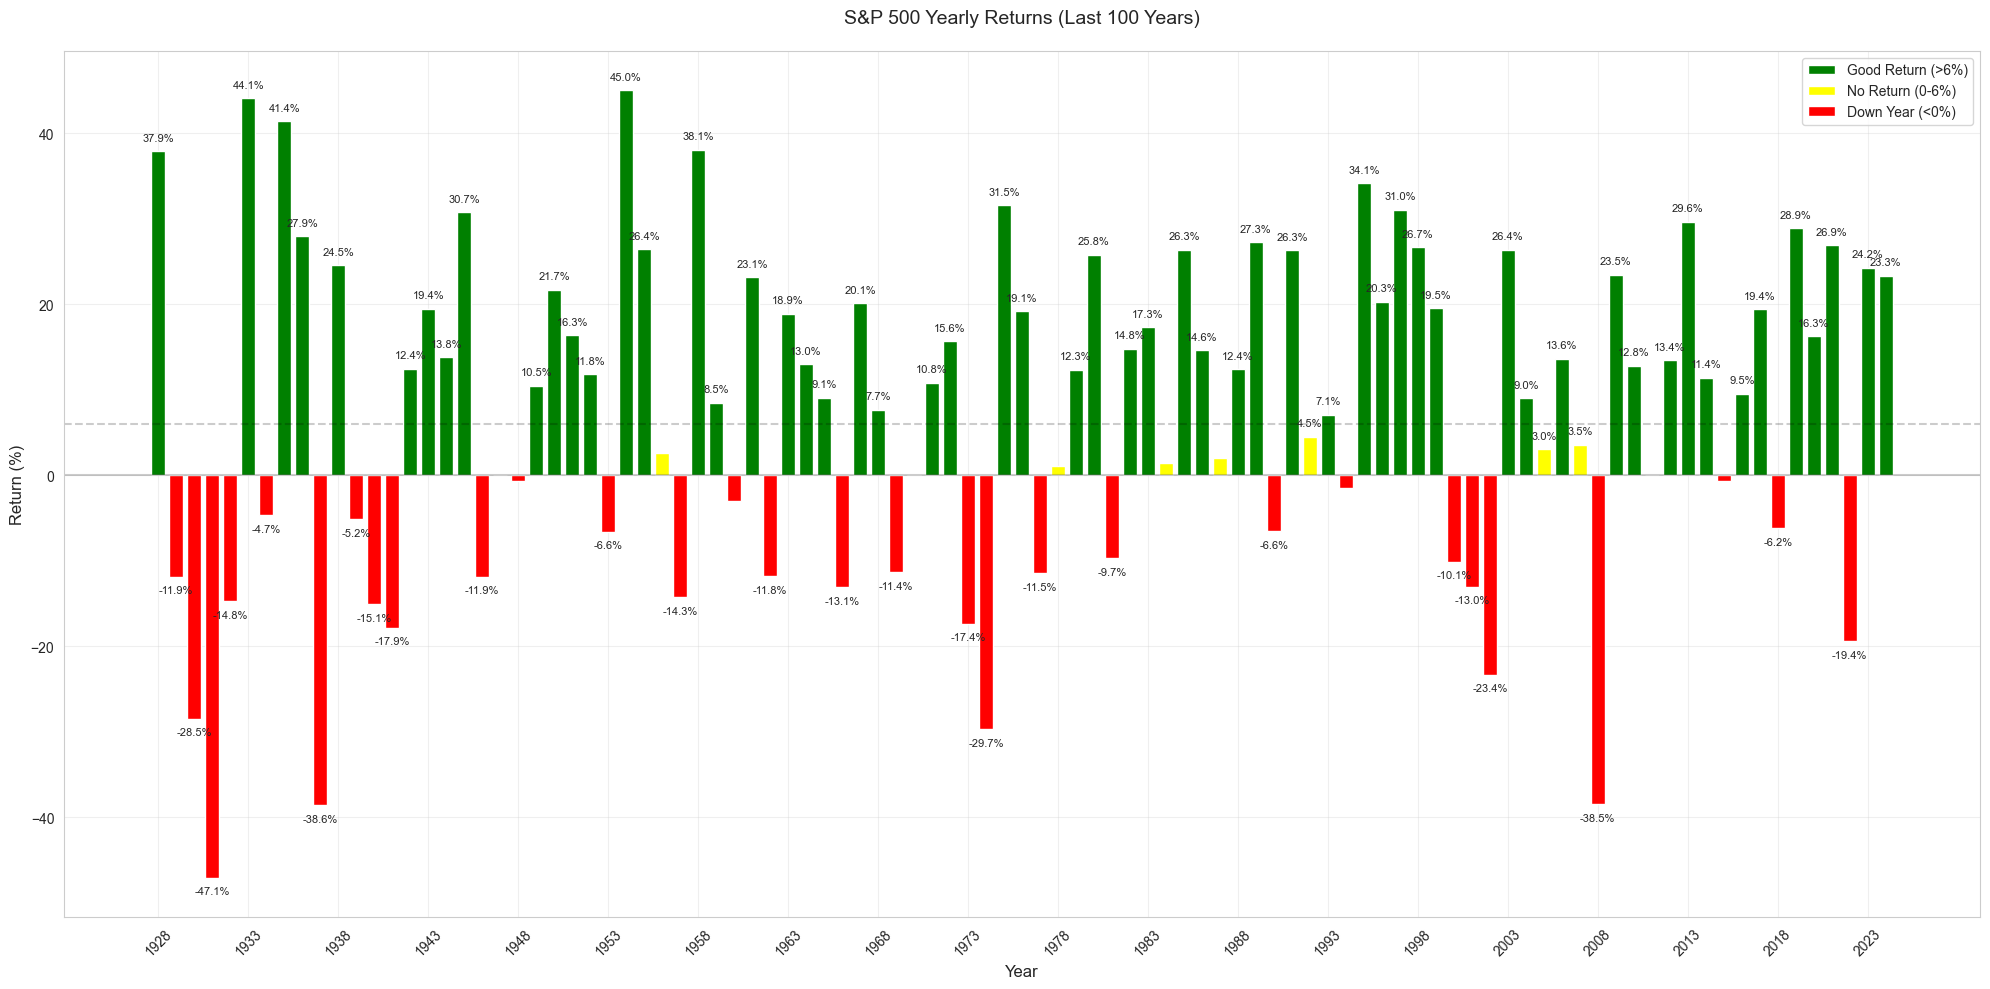

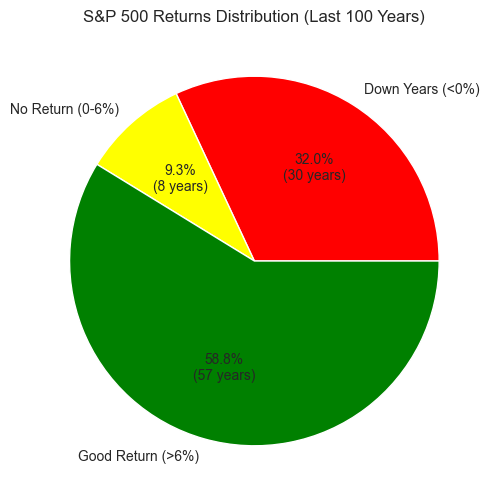

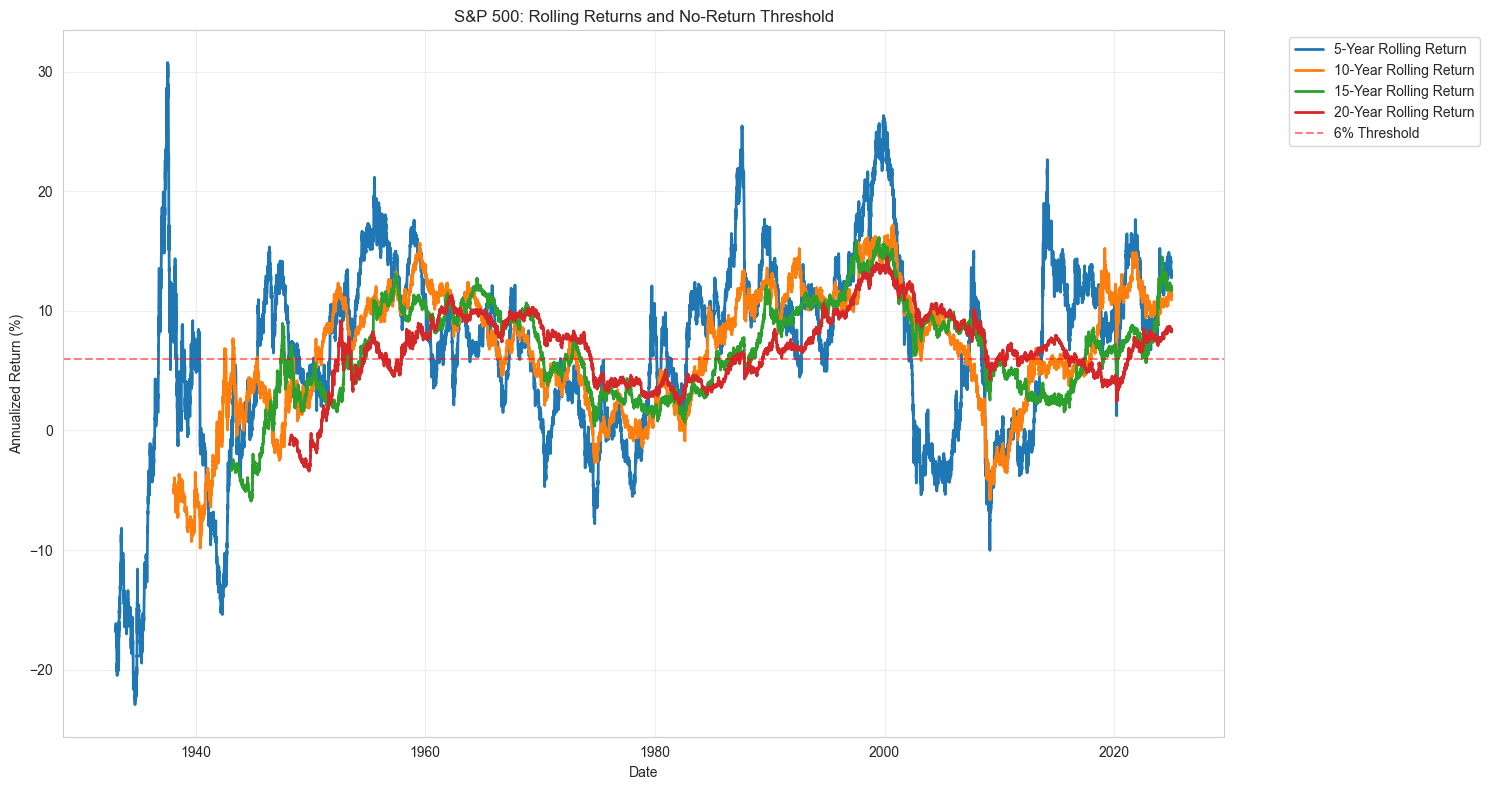


Periods Below 6% Return:
5-Year Rolling Returns: 105.4% of time below 6% threshold
10-Year Rolling Returns: 111.5% of time below 6% threshold
15-Year Rolling Returns: 118.4% of time below 6% threshold
20-Year Rolling Returns: 126.1% of time below 6% threshold


In [12]:

# Fetch data
print("Fetching S&P 500 historical data...")
start_date = '1926-01-01'
end_date = '2025-01-01'
print(f"Fetched data from {start_date} to {end_date}")
sp500_data = spa.fetch_sp500_data(start_date, end_date)

# Analyze yearly returns
yearly_returns, down_years, no_return_years, good_return_years = spa.analyze_yearly_returns(sp500_data)

# Plot yearly returns waterfall chart
spa.plot_yearly_returns_waterfall(yearly_returns)

# Plot returns distribution
spa.plot_returns_distribution(yearly_returns, down_years, no_return_years, good_return_years)

# Analyze and plot rolling returns
spa.analyze_rolling_returns(sp500_data)


#### **Down years**

In [13]:
down_years

Ticker,^GSPC
Date,
1929-12-31,-11.91
1930-12-31,-28.48
1931-12-31,-47.07
1932-12-31,-14.78
1934-12-31,-4.71
1937-12-31,-38.59
1939-12-31,-5.18
1940-12-31,-15.09
1941-12-31,-17.86


 #### **No Return Years**

In [14]:
no_return_years

Ticker,^GSPC
Date,
1947-12-31,0.00
1956-12-31,2.62
1970-12-31,0.10
1978-12-31,1.06
1984-12-31,1.40
1987-12-31,2.03
1992-12-31,4.46
2005-12-31,3.00
2007-12-31,3.53


 #### **Good Return Years**

In [15]:
good_return_years

Ticker,^GSPC
Date,
1928-12-31,37.88
1933-12-31,44.08
1935-12-31,41.37
1936-12-31,27.92
1938-12-31,24.55
1942-12-31,12.43
1943-12-31,19.45
1944-12-31,13.80
1945-12-31,30.72


# **Home Work 3 - Michael Burry Analysis**

#### Pulled this Information from  Scion Asset Management's SEC 13F filings for Q1 2025, covering the period from January 1 to March 31, 2025. 

Michael Burry made significant changes to his investment portfolio for long and short investments:

#### **Long Investments:**
Estee Lauder Companies Inc. (EL): He doubled his stake in Estee Lauder, increasing his holdings from 100,000 shares at the end of December 2024 to 200,000 shares by the end of March 2025, valued at approximately $13.2 million. This move explains his strong conviction in the company's potential turnaround. 

#### **Short Investments via Put Options:**
He adopted a kinda bearish stance by initiating substantial put options against several major technology companies:

NVIDIA Corporation (NVDA): Acquired 900,000 put contracts valued at approximately $97.5 million, representing nearly half of Scion's portfolio. This indicates a significant bet against the AI-driven tech surge. 
 

##### **Chinese Tech Companies:**
Alibaba Group Holding Ltd. (BABA): 200,000 put contracts valued at $26.4 million.

PDD Holdings Inc. (PDD): 200,000 put contracts valued at $23.7 million.

JD.com Inc. (JD): 400,000 put contracts valued at $16.4 million.

Baidu Inc. (BIDU): 100,000 put contracts valued at $9.2 million.


I agree with his bearish stance as I think AI world will become saturated soon. So there will be a further correction before things stabilize